# Brute-force Metropolis algorithm for non-interacting particles in a spherical potential trap

### Usefull functions for calculating various properties and analyzing the data samples:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

def extractInfo(file, alpha, num_dims, num_particles):
    """Function for extracting the information of interest. Assumes that the 
    file contains one last line with computational time of the code. 
    """
    
    file = open(file, "r")
    
    temp = np.array([i for i in file])
    local_energies = np.array([float(j) for j in temp[:-1]])
    
    time = temp[-1].split(" ")[-1]
    number_of_metropolis_steps = len(local_energies)
    
    total_energy = np.mean(local_energies)
    total_energy_boot = tsboot(local_energies, stat, 2**12, 2**10)

    
    energy_per_particle = total_energy/float(num_particles)
    
    blocking_total_energy, blocking_variance = block(local_energies)
    
    standard_variance = np.var(local_energies, axis = 0)/len(local_energies)
    
    total_energy_development = np.cumsum(local_energies)
    total_energy_development = np.array([energy/float(num+1) for num, energy in enumerate(total_energy_development)])
    
    accepted_steps = 0
    for i in range(1, len(local_energies)):
        if(local_energies[i] != local_energies[i-1]):
            accepted_steps += 1
    
    acceptance_ratio = accepted_steps/number_of_metropolis_steps
    
    
    return total_energy, energy_per_particle, blocking_variance, total_energy_development, time, acceptance_ratio, standard_variance, total_energy_boot


# from numpy import log2, zeros, mean, var, sum, loadtxt, arange, array, cumsum, dot, transpose, diagonal, sqrt
from numpy.linalg import inv

def block(x):
    """Finds the mean and the variance using blocking.

    Params
    ------
    x: numpy array
        Array that contains the sampled local energies from a MCMC-simulation. 
    """
    # preliminaries
    n = len(x)
    d = int(np.log2(n))
    s, gamma = np.zeros(d), np.zeros(d)
    mu = np.mean(x)

    # estimate the auto-covariance and variances 
    # for each blocking transformation
    for i in np.arange(0,d):
        n = len(x)
        # estimate autocovariance of x
        gamma[i] = (n)**(-1)*np.sum( (x[0:(n-1)]-mu)*(x[1:n]-mu) )
        # estimate variance of x
        s[i] = np.var(x)
        # perform blocking transformation
        x = 0.5*(x[0:-1:2] + x[1::2])
   
    # generate the test observator M_k from the theorem
    M = (np.cumsum( ((gamma/s)**2*2**np.arange(1,d+1)[::-1])[::-1] )  )[::-1]

    # we need a list of magic numbers
    q =np.array([6.634897,9.210340, 11.344867, 13.276704, 15.086272, 16.811894, 18.475307, 20.090235, 21.665994, 23.209251, 24.724970, 26.216967, 27.688250, 29.141238, 30.577914, 31.999927, 33.408664, 34.805306, 36.190869, 37.566235, 38.932173, 40.289360, 41.638398, 42.979820, 44.314105, 45.641683, 46.962942, 48.278236, 49.587884, 50.892181])

    # use magic to determine when we should have stopped blocking
    for k in np.arange(0,d):
        if(M[k] < q[k]):
            break
    if (k >= d-1):
        print("Warning: Use more data")
    return mu, s[k]/2**(d-k)

def exactValue(alpha, num_dims, num_particles):
    """Returns the exact energy for the non-interacting case in a spherical trap. 
    """
    return (alpha/2. + 1./(8*alpha))*num_particles*num_dims

# print(extractInfo("Data/non_interacting_metropolis_local_energy_values_a_0.000000_num_particles_1_num_dims_1_alpha_0.450000.txt", 0.45, 1,1))

def tsboot(data,statistic,R,l):
    t = np.zeros(R); n = len(data); k = int(np.ceil(float(n)/l));
    inds = np.arange(n); t0 = time()
    
    # time series bootstrap
    for i in range(R):
        # construct bootstrap sample from
        # k chunks of data. The chunksize is l
        _data = np.concatenate([data[j:j+l] for j in np.random.randint(0,n-l,k)])[0:n];
        t[i] = statistic(_data)

    # analysis
    print ("Runtime: %g sec" % (time()-t0)); print ("Bootstrap Statistics :")
    print ("original           bias      std. error")
    print ("%8g %14g %15g" % (statistic(data), \
                             np.mean(t) - statistic(data), \
                             np.std(t) ))
    return t

def stat(data):
    return np.mean(data)


# 1 particle in 1 dimension

Plots/metropolis_non_interacting_num_particles_1_num_dims_1.png
Runtime: 14.4662 sec
Bootstrap Statistics :
original           bias      std. error
0.513492   -2.83156e-05     0.000632417
Runtime: 15.0159 sec
Bootstrap Statistics :
original           bias      std. error
     0.5              0               0


c:\users\marth\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in true_divide


Runtime: 15.0724 sec
Bootstrap Statistics :
original           bias      std. error
0.508159    8.69131e-06     0.000440402
Alpha   Energy bootstrap         Energy    Error               Energy/particle   Var blocking   Var standard        Accpetance ratio    Time           
0.4     0.51346                  0.51349   0.00099183          0.513491827       3.8138e-07     4.8961e-08          0.751               0.218          
0.5     0.5                      0.5       0.0                 0.5               0.0            0.0                 0.0                 0.25
          
0.6     0.50817                  0.50816   0.00017482          0.5081585123      1.8075e-07     3.2037e-08          0.69284             0.234          


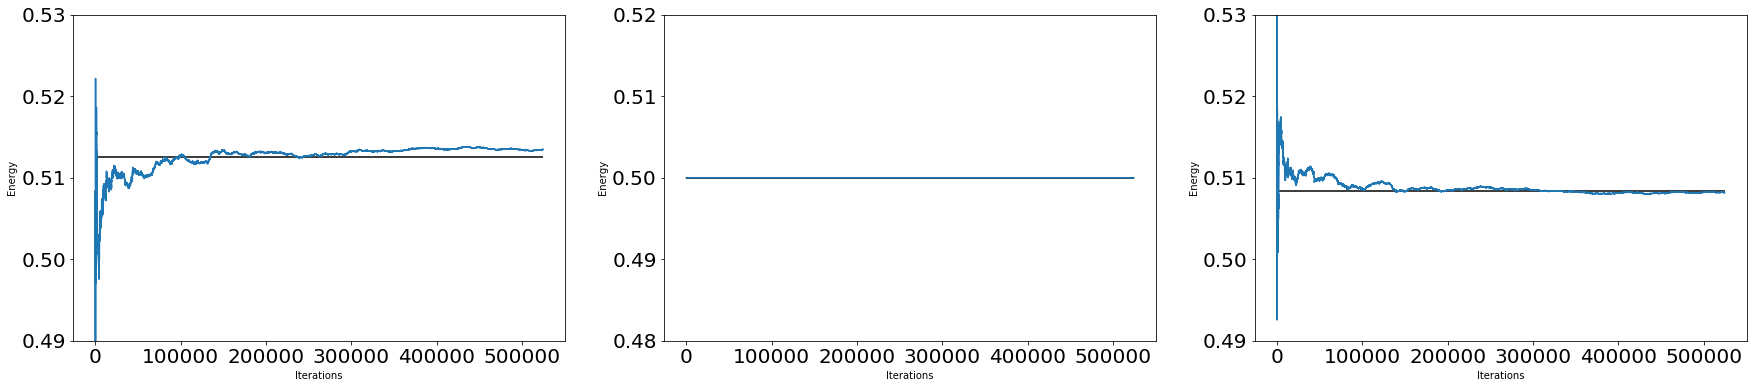

In [13]:
plt.rcParams["figure.figsize"] = 30,6
# plt.rcParams["font.size"] = 30
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20

num_particles = 1
num_dims = 1
interaction = "non_interacting"
method = "metropolis"

plot_name = r"Plots/" +  method + "_" + interaction + "_num_particles_" + str(num_particles) + "_num_dims_" + str(num_dims) + ".png"
print(plot_name)
savefigure = False

alpha_values = [0.4, 0.5, 0.6]
exact_values = np.array([exactValue(alpha_value, num_dims, num_particles) for alpha_value in alpha_values])

alpha_0_4 = extractInfo("Data/non_interacting_metropolis_local_energy_values_a_0.000000_num_particles_1_num_dims_1_alpha_0.400000.txt", 0.4, num_dims, num_particles)
alpha_0_5 = extractInfo("Data/non_interacting_metropolis_local_energy_values_a_0.000000_num_particles_1_num_dims_1_alpha_0.500000.txt", 0.5, num_dims, num_particles)
alpha_0_6 = extractInfo("Data/non_interacting_metropolis_local_energy_values_a_0.000000_num_particles_1_num_dims_1_alpha_0.600000.txt", 0.6, num_dims, num_particles)


print("{0:<8}".format("Alpha") + "{0:<25}".format("Energy bootstrap") +  "{0:<10}".format("Energy") + "{0:<20}".format("Error") + "{0:<18}".format("Energy/particle") + "{0:<15}".format("Var blocking") + "{0:<20}".format("Var standard") + "{0:<20}".format("Accpetance ratio") + "{0:<15}".format("Time")  )

for alpha, values, exact_value in zip(alpha_values, [alpha_0_4, alpha_0_5, alpha_0_6], exact_values):
    print("{0:<8}".format(alpha) + "{0:<25.5}".format(np.mean(values[7])) + "{0:<10.5}".format(values[0]) + "{0:<20.5}".format(abs(exact_value - values[0])) + "{0:<18.10}".format(values[1]) + "{0:<15.5}".format(values[2]) + "{0:<20.5}".format(values[6])  +  "{0:<20.5}".format(values[5])+  "{0:<15.5}".format(values[4])  )



# for alpha in alpha_values:
    

plt.subplot(131)
plt.plot(alpha_0_4[3])
plt.xlabel("Iterations")
plt.ylabel("Energy")
plt.hlines(exact_values[0], 0, len(alpha_0_4[3]))
plt.ylim((0.51-0.02, 0.51+0.02))

plt.subplot(132)
plt.xlabel("Iterations")
plt.ylabel("Energy")
plt.plot(alpha_0_5[3])
plt.hlines(exact_values[1], 0, len(alpha_0_5[3]))
plt.ylim((0.5-0.02, 0.5+0.02))

plt.subplot(133)
plt.plot(alpha_0_6[3])
plt.xlabel("Iterations")
plt.ylabel("Energy")
plt.hlines(exact_values[2], 0, len(alpha_0_6[3]))
plt.ylim((0.51-0.02, 0.51+0.02))

if(savefigure):
    plt.savefig(plot_name)

plt.show()




# 1 particle in 3 dimensions

Plots/metropolis_non_interacting_num_particles_1_num_dims_3.png


c:\users\marth\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in true_divide


Alpha   Energy    Error               Energy/particle   Var blocking   Accpetance ratio    Time           
0.4     1.5361    0.0013605           1.536139541       1.6114e-06     0.58401             0.265          
0.5     1.5       0.0                 1.5               0.0            0.0                 0.265          
0.6     1.5262    0.0011592           1.52615922        9.1704e-07     0.50114             0.281          


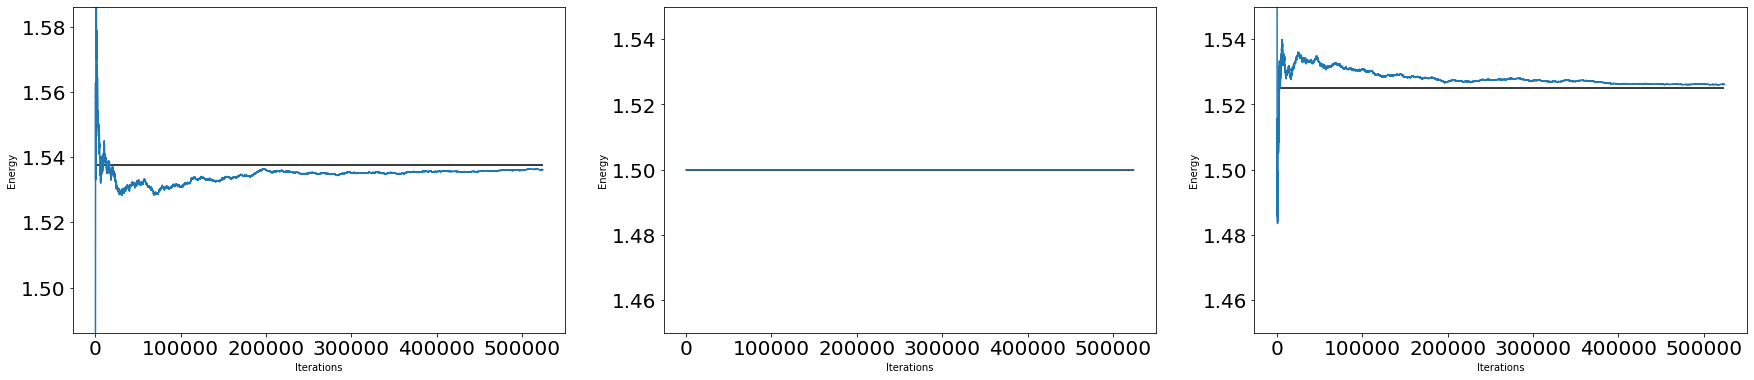

In [3]:
plt.rcParams["figure.figsize"] = 30,6
# plt.rcParams["font.size"] = 30
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20

num_particles = 1
num_dims = 3
interaction = "non_interacting"
method = "metropolis"

plot_name = r"Plots/" +  method + "_" + interaction + "_num_particles_" + str(num_particles) + "_num_dims_" + str(num_dims) + ".png"
print(plot_name)
savefigure = False

alpha_values = [0.4, 0.5, 0.6]
exact_values = np.array([exactValue(alpha_value, num_dims, num_particles) for alpha_value in alpha_values])

alpha_0_4 = extractInfo("Data/non_interacting_metropolis_local_energy_values_a_0.000000_num_particles_1_num_dims_3_alpha_0.400000.txt", 0.4, num_dims, num_particles)
alpha_0_5 = extractInfo("Data/non_interacting_metropolis_local_energy_values_a_0.000000_num_particles_1_num_dims_3_alpha_0.500000.txt", 0.5, num_dims, num_particles)
alpha_0_6 = extractInfo("Data/non_interacting_metropolis_local_energy_values_a_0.000000_num_particles_1_num_dims_3_alpha_0.600000.txt", 0.6, num_dims, num_particles)


print("{0:<8}".format("Alpha") + "{0:<10}".format("Energy") + "{0:<20}".format("Error") + "{0:<18}".format("Energy/particle") + "{0:<15}".format("Var blocking") + "{0:<20}".format("Accpetance ratio") + "{0:<15}".format("Time")  )

for alpha, values, exact_value in zip(alpha_values, [alpha_0_4, alpha_0_5, alpha_0_6], exact_values):
    print("{0:<8}".format(alpha) + "{0:<10.5}".format(values[0]) + "{0:<20.5}".format(abs(exact_value - values[0])) + "{0:<18.10}".format(values[1]) + "{0:<15.5}".format(values[2]) +  "{0:<20.5}".format(values[5])+  "{0:<15.5}".format(values[4])  )



# for alpha in alpha_values:
    

plt.subplot(131)
plt.plot(alpha_0_4[3])
plt.xlabel("Iterations")
plt.ylabel("Energy")
plt.hlines(exact_values[0], 0, len(alpha_0_4[3]))
plt.ylim((alpha_0_4[1] - 0.05, alpha_0_4[1] + 0.05))

plt.subplot(132)
plt.xlabel("Iterations")
plt.ylabel("Energy")
plt.plot(alpha_0_5[3])
plt.hlines(exact_values[1], 0, len(alpha_0_5[3]))
plt.ylim((alpha_0_5[1] - 0.05, alpha_0_5[1] + 0.05))

plt.subplot(133)
plt.plot(alpha_0_6[3])
plt.xlabel("Iterations")
plt.ylabel("Energy")
plt.hlines(exact_values[2], 0, len(alpha_0_6[3]))
plt.ylim((alpha_0_5[1] - 0.05, alpha_0_5[1] + 0.05))

if(savefigure):
    plt.savefig(plot_name)

plt.show()




# 10 particles in 1 dimension

Plots/metropolis_non_interacting_num_particles_10_num_dims_1.png


c:\users\marth\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in true_divide


Alpha   Energy    Error               Energy/particle   Var blocking   Accpetance ratio    Time           
0.4     5.1138    0.011206            0.5113794157      3.4108e-05     0.75341             0.859          
0.5     5.0       0.0                 0.5               0.0            0.0                 0.859          
0.6     5.0889    0.0055706           0.508890389       1.8026e-05     0.69802             0.875          


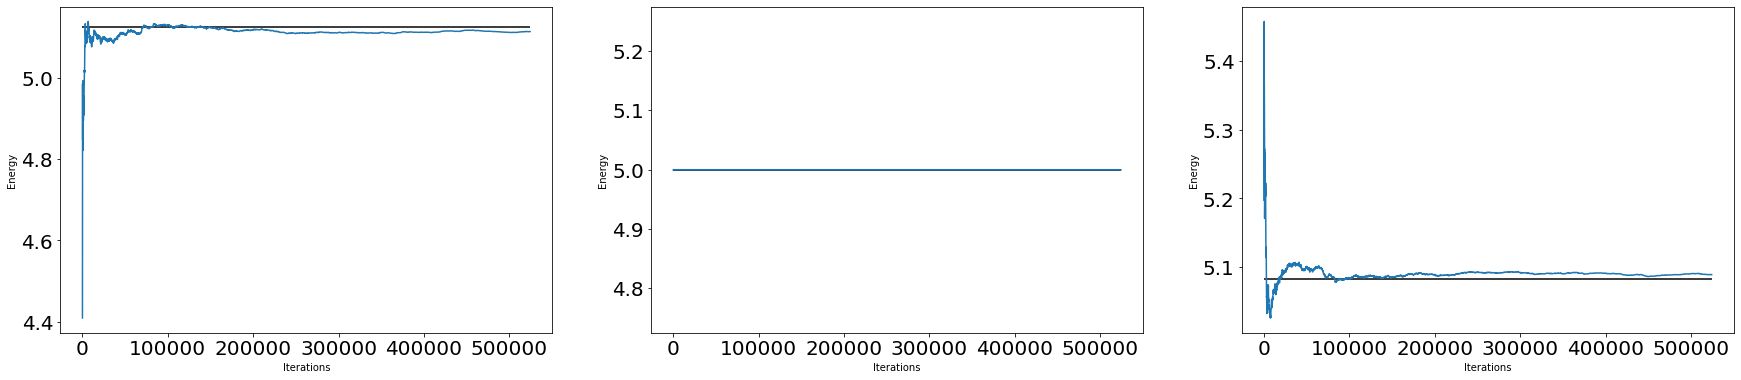

In [4]:
plt.rcParams["figure.figsize"] = 30,6
# plt.rcParams["font.size"] = 30
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20

num_particles = 10
num_dims = 1
interaction = "non_interacting"
method = "metropolis"

plot_name = r"Plots/" +  method + "_" + interaction + "_num_particles_" + str(num_particles) + "_num_dims_" + str(num_dims) + ".png"
print(plot_name)
savefigure = False

alpha_values = [0.4, 0.5, 0.6]
exact_values = np.array([exactValue(alpha_value, num_dims, num_particles) for alpha_value in alpha_values])

alpha_0_4 = extractInfo("Data/non_interacting_metropolis_local_energy_values_a_0.000000_num_particles_10_num_dims_1_alpha_0.400000.txt", 0.4, num_dims, num_particles)
alpha_0_5 = extractInfo("Data/non_interacting_metropolis_local_energy_values_a_0.000000_num_particles_10_num_dims_1_alpha_0.500000.txt", 0.5, num_dims, num_particles)
alpha_0_6 = extractInfo("Data/non_interacting_metropolis_local_energy_values_a_0.000000_num_particles_10_num_dims_1_alpha_0.600000.txt", 0.6, num_dims, num_particles)


print("{0:<8}".format("Alpha") + "{0:<10}".format("Energy") + "{0:<20}".format("Error") + "{0:<18}".format("Energy/particle") + "{0:<15}".format("Var blocking") + "{0:<20}".format("Accpetance ratio") + "{0:<15}".format("Time")  )

for alpha, values, exact_value in zip(alpha_values, [alpha_0_4, alpha_0_5, alpha_0_6], exact_values):
    print("{0:<8}".format(alpha) + "{0:<10.5}".format(values[0]) + "{0:<20.5}".format(abs(exact_value - values[0])) + "{0:<18.10}".format(values[1]) + "{0:<15.5}".format(values[2]) +  "{0:<20.5}".format(values[5])+  "{0:<15.5}".format(values[4])  )



# for alpha in alpha_values:
    

plt.subplot(131)
plt.plot(alpha_0_4[3])
plt.xlabel("Iterations")
plt.ylabel("Energy")
plt.hlines(exact_values[0], 0, len(alpha_0_4[3]))
# plt.ylim((alpha_0_4[1] - 0.05, alpha_0_4[1] + 0.05))

plt.subplot(132)
plt.xlabel("Iterations")
plt.ylabel("Energy")
plt.plot(alpha_0_5[3])
plt.hlines(exact_values[1], 0, len(alpha_0_5[3]))
# plt.ylim((alpha_0_5[1] - 0.05, alpha_0_5[1] + 0.05))

plt.subplot(133)
plt.plot(alpha_0_6[3])
plt.xlabel("Iterations")
plt.ylabel("Energy")
plt.hlines(exact_values[2], 0, len(alpha_0_6[3]))
# plt.ylim((alpha_0_5[1] - 0.05, alpha_0_5[1] + 0.05))

if(savefigure):
    plt.savefig(plot_name)

plt.show()




# 10 particles in 3 dimensions

Plots/metropolis_non_interacting_num_particles_10_num_dims_3.png


c:\users\marth\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in true_divide


Alpha   Energy    Error               Energy/particle   Var blocking   Accpetance ratio    Time           
0.4     15.384    0.0086031           1.538360314       0.00016827     0.58384             0.953          
0.5     15.0      0.0                 1.5               0.0            0.0                 0.953          
0.6     15.243    0.0072112           1.524278877       0.00010209     0.50221             0.953          


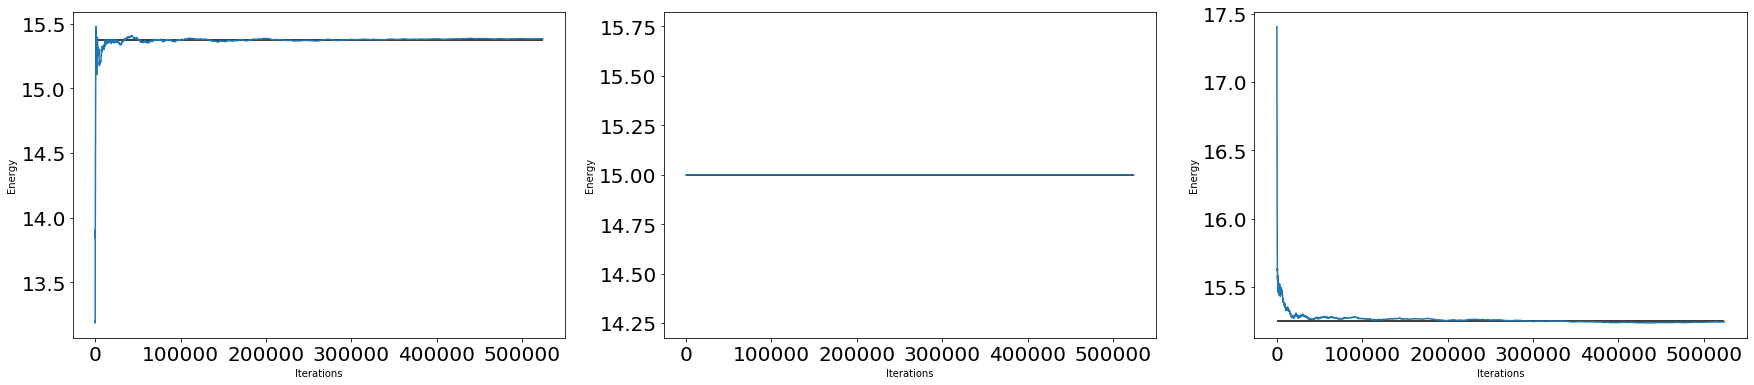

In [5]:
plt.rcParams["figure.figsize"] = 30,6
# plt.rcParams["font.size"] = 30
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20

num_particles = 10
num_dims = 3
interaction = "non_interacting"
method = "metropolis"

plot_name = r"Plots/" +  method + "_" + interaction + "_num_particles_" + str(num_particles) + "_num_dims_" + str(num_dims) + ".png"
print(plot_name)
savefigure = False

alpha_values = [0.4, 0.5, 0.6]
exact_values = np.array([exactValue(alpha_value, num_dims, num_particles) for alpha_value in alpha_values])

alpha_0_4 = extractInfo("Data/non_interacting_metropolis_local_energy_values_a_0.000000_num_particles_10_num_dims_3_alpha_0.400000.txt", 0.4, num_dims, num_particles)
alpha_0_5 = extractInfo("Data/non_interacting_metropolis_local_energy_values_a_0.000000_num_particles_10_num_dims_3_alpha_0.500000.txt", 0.5, num_dims, num_particles)
alpha_0_6 = extractInfo("Data/non_interacting_metropolis_local_energy_values_a_0.000000_num_particles_10_num_dims_3_alpha_0.600000.txt", 0.6, num_dims, num_particles)


print("{0:<8}".format("Alpha") + "{0:<10}".format("Energy") + "{0:<20}".format("Error") + "{0:<18}".format("Energy/particle") + "{0:<15}".format("Var blocking") + "{0:<20}".format("Accpetance ratio") + "{0:<15}".format("Time")  )

for alpha, values, exact_value in zip(alpha_values, [alpha_0_4, alpha_0_5, alpha_0_6], exact_values):
    print("{0:<8}".format(alpha) + "{0:<10.5}".format(values[0]) + "{0:<20.5}".format(abs(exact_value - values[0])) + "{0:<18.10}".format(values[1]) + "{0:<15.5}".format(values[2]) +  "{0:<20.5}".format(values[5])+  "{0:<15.5}".format(values[4])  )



# for alpha in alpha_values:
    

plt.subplot(131)
plt.plot(alpha_0_4[3])
plt.xlabel("Iterations")
plt.ylabel("Energy")
plt.hlines(exact_values[0], 0, len(alpha_0_4[3]))
# plt.ylim((alpha_0_4[1] - 0.05, alpha_0_4[1] + 0.05))

plt.subplot(132)
plt.xlabel("Iterations")
plt.ylabel("Energy")
plt.plot(alpha_0_5[3])
plt.hlines(exact_values[1], 0, len(alpha_0_5[3]))
# plt.ylim((alpha_0_5[1] - 0.05, alpha_0_5[1] + 0.05))

plt.subplot(133)
plt.plot(alpha_0_6[3])
plt.xlabel("Iterations")
plt.ylabel("Energy")
plt.hlines(exact_values[2], 0, len(alpha_0_6[3]))
# plt.ylim((alpha_0_5[1] - 0.05, alpha_0_5[1] + 0.05))

if(savefigure):
    plt.savefig(plot_name)

plt.show()




# 100 particles in 1 dimension

Plots/metropolis_non_interacting_num_particles_100_num_dims_1.png


c:\users\marth\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in true_divide


Alpha   Energy    Error               Energy/particle   Var blocking   Accpetance ratio    Time           
0.4     51.249    0.001224            0.5124877603      0.0031497      0.75192             7.109          
0.5     50.0      0.0                 0.5               0.0            0.0                 7.031          
0.6     50.837    0.00341             0.5083674338      0.0013695      0.69971             7.078          


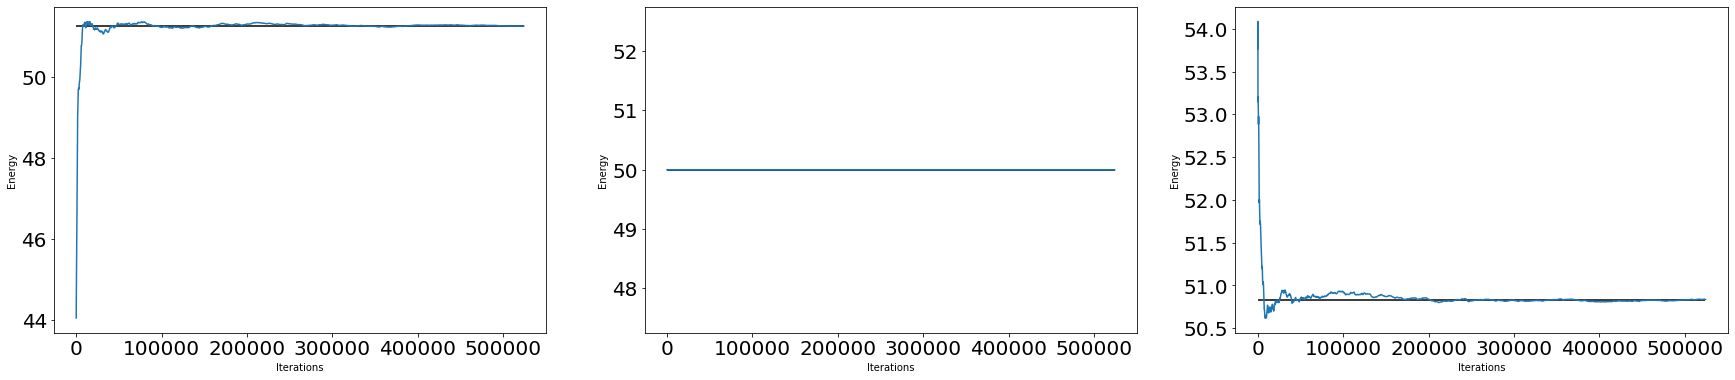

In [6]:
plt.rcParams["figure.figsize"] = 30,6
# plt.rcParams["font.size"] = 30
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20

num_particles = 100
num_dims = 1
interaction = "non_interacting"
method = "metropolis"

plot_name = r"Plots/" +  method + "_" + interaction + "_num_particles_" + str(num_particles) + "_num_dims_" + str(num_dims) + ".png"
print(plot_name)
savefigure = False

alpha_values = [0.4, 0.5, 0.6]
exact_values = np.array([exactValue(alpha_value, num_dims, num_particles) for alpha_value in alpha_values])

alpha_0_4 = extractInfo("Data/non_interacting_metropolis_local_energy_values_a_0.000000_num_particles_100_num_dims_1_alpha_0.400000.txt", 0.4, num_dims, num_particles)
alpha_0_5 = extractInfo("Data/non_interacting_metropolis_local_energy_values_a_0.000000_num_particles_100_num_dims_1_alpha_0.500000.txt", 0.5, num_dims, num_particles)
alpha_0_6 = extractInfo("Data/non_interacting_metropolis_local_energy_values_a_0.000000_num_particles_100_num_dims_1_alpha_0.600000.txt", 0.6, num_dims, num_particles)


print("{0:<8}".format("Alpha") + "{0:<10}".format("Energy") + "{0:<20}".format("Error") + "{0:<18}".format("Energy/particle") + "{0:<15}".format("Var blocking") + "{0:<20}".format("Accpetance ratio") + "{0:<15}".format("Time")  )

for alpha, values, exact_value in zip(alpha_values, [alpha_0_4, alpha_0_5, alpha_0_6], exact_values):
    print("{0:<8}".format(alpha) + "{0:<10.5}".format(values[0]) + "{0:<20.5}".format(abs(exact_value - values[0])) + "{0:<18.10}".format(values[1]) + "{0:<15.5}".format(values[2]) +  "{0:<20.5}".format(values[5])+  "{0:<15.5}".format(values[4])  )



# for alpha in alpha_values:
    

plt.subplot(131)
plt.plot(alpha_0_4[3])
plt.xlabel("Iterations")
plt.ylabel("Energy")
plt.hlines(exact_values[0], 0, len(alpha_0_4[3]))
# plt.ylim((alpha_0_4[1] - 0.05, alpha_0_4[1] + 0.05))

plt.subplot(132)
plt.xlabel("Iterations")
plt.ylabel("Energy")
plt.plot(alpha_0_5[3])
plt.hlines(exact_values[1], 0, len(alpha_0_5[3]))
# plt.ylim((alpha_0_5[1] - 0.05, alpha_0_5[1] + 0.05))

plt.subplot(133)
plt.plot(alpha_0_6[3])
plt.xlabel("Iterations")
plt.ylabel("Energy")
plt.hlines(exact_values[2], 0, len(alpha_0_6[3]))
# plt.ylim((alpha_0_5[1] - 0.05, alpha_0_5[1] + 0.05))

if(savefigure):
    plt.savefig(plot_name)

plt.show()




# 100 particles in 3 dimensions

Plots/metropolis_non_interacting_num_particles_100_num_dims_3.png
Runtime: 14.3924 sec
Bootstrap Statistics :
original           bias      std. error
 153.768       0.015919        0.101293
Runtime: 14.0893 sec
Bootstrap Statistics :
original           bias      std. error
     150              0               0


c:\users\marth\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in true_divide


Runtime: 15.0417 sec
Bootstrap Statistics :
original           bias      std. error
 152.416    -0.00685985       0.0796067
Alpha   Energy bootstrap         Energy    Error               Energy/particle   Var blocking   Var standard        Accpetance ratio    Time           
0.4     153.78                   153.77    0.018392            1.537683917       0.019798       1.5772e-05          0.58162             7.468          
0.5     150.0                    150.0     0.0                 1.5               0.0            0.0                 0.0                 7.515          
0.6     152.41                   152.42    0.083809            1.524161906       0.009019       1.0381e-05          0.50005             7.468          


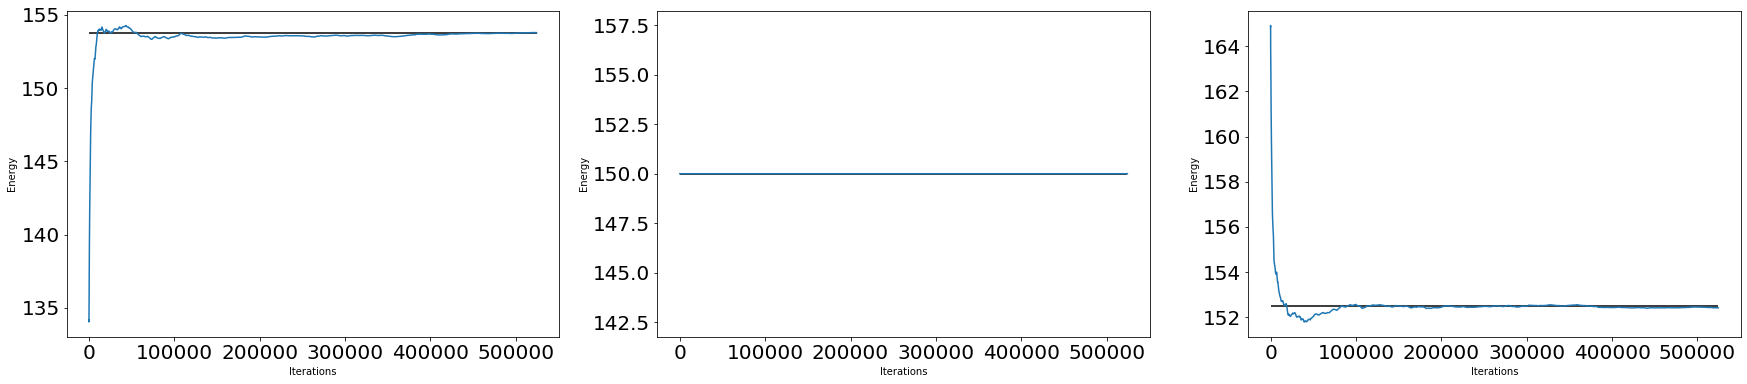

In [14]:
plt.rcParams["figure.figsize"] = 30,6
# plt.rcParams["font.size"] = 30
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20

num_particles = 100
num_dims = 3
interaction = "non_interacting"
method = "metropolis"

plot_name = r"Plots/" +  method + "_" + interaction + "_num_particles_" + str(num_particles) + "_num_dims_" + str(num_dims) + ".png"
print(plot_name)
savefigure = True

alpha_values = [0.4, 0.5, 0.6]
exact_values = np.array([exactValue(alpha_value, num_dims, num_particles) for alpha_value in alpha_values])

alpha_0_4 = extractInfo("Data/non_interacting_metropolis_local_energy_values_a_0.000000_num_particles_100_num_dims_3_alpha_0.400000.txt", 0.4, num_dims, num_particles)
alpha_0_5 = extractInfo("Data/non_interacting_metropolis_local_energy_values_a_0.000000_num_particles_100_num_dims_3_alpha_0.500000.txt", 0.5, num_dims, num_particles)
alpha_0_6 = extractInfo("Data/non_interacting_metropolis_local_energy_values_a_0.000000_num_particles_100_num_dims_3_alpha_0.600000.txt", 0.6, num_dims, num_particles)


print("{0:<8}".format("Alpha") + "{0:<25}".format("Energy bootstrap") +  "{0:<10}".format("Energy") + "{0:<20}".format("Error") + "{0:<18}".format("Energy/particle") + "{0:<15}".format("Var blocking") + "{0:<20}".format("Var standard") + "{0:<20}".format("Accpetance ratio") + "{0:<15}".format("Time")  )

for alpha, values, exact_value in zip(alpha_values, [alpha_0_4, alpha_0_5, alpha_0_6], exact_values):
    print("{0:<8}".format(alpha) + "{0:<25.5}".format(np.mean(values[7])) + "{0:<10.5}".format(values[0]) + "{0:<20.5}".format(abs(exact_value - values[0])) + "{0:<18.10}".format(values[1]) + "{0:<15.5}".format(values[2]) + "{0:<20.5}".format(values[6])  +  "{0:<20.5}".format(values[5])+  "{0:<15.5}".format(values[4])  )




# for alpha in alpha_values:
    

plt.subplot(131)
plt.plot(alpha_0_4[3])
plt.xlabel("Iterations")
plt.ylabel("Energy")
plt.hlines(exact_values[0], 0, len(alpha_0_4[3]))
# plt.ylim((alpha_0_4[1] - 0.05, alpha_0_4[1] + 0.05))

plt.subplot(132)
plt.xlabel("Iterations")
plt.ylabel("Energy")
plt.plot(alpha_0_5[3])
plt.hlines(exact_values[1], 0, len(alpha_0_5[3]))
# plt.ylim((alpha_0_5[1] - 0.05, alpha_0_5[1] + 0.05))

plt.subplot(133)
plt.plot(alpha_0_6[3])
plt.xlabel("Iterations")
plt.ylabel("Energy")
plt.hlines(exact_values[2], 0, len(alpha_0_6[3]))
# plt.ylim((alpha_0_5[1] - 0.05, alpha_0_5[1] + 0.05))

if(savefigure):
    plt.savefig(plot_name)

plt.show()




# 500 particles in 3 dimensions

Plots/metropolis_non_interacting_num_particles_500_num_dims_3.png
Runtime: 14.6963 sec
Bootstrap Statistics :
original           bias      std. error
 763.234      0.0818447         0.20023
Runtime: 14.2945 sec
Bootstrap Statistics :
original           bias      std. error
     750              0               0


c:\users\marth\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in true_divide


Runtime: 14.3763 sec
Bootstrap Statistics :
original           bias      std. error
 766.866      -0.043925        0.128243
Alpha   Energy bootstrap         Energy    Error               Energy/particle   Var blocking   Var standard        Accpetance ratio    Time           
0.4     763.32                   763.23    5.5163              1.526467315       0.16003        5.886e-05           0.57391             41.28          
0.5     750.0                    750.0     0.0                 1.5               0.0            0.0                 0.0                 41.26          
0.6     766.82                   766.87    4.3659              1.533731711       0.04733        2.343e-05           0.49194             42.70          


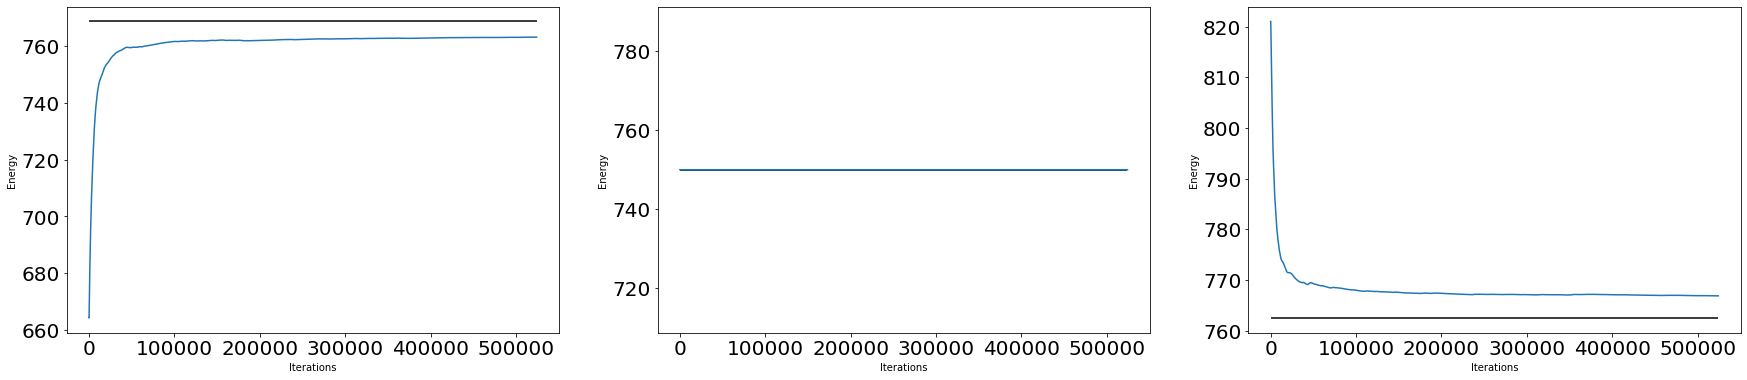

In [3]:
plt.rcParams["figure.figsize"] = 30,6
# plt.rcParams["font.size"] = 30
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20

num_particles = 500
num_dims = 3
interaction = "non_interacting"
method = "metropolis"

plot_name = r"Plots/" +  method + "_" + interaction + "_num_particles_" + str(num_particles) + "_num_dims_" + str(num_dims) + ".png"
print(plot_name)
savefigure = True

alpha_values = [0.4, 0.5, 0.6]
exact_values = np.array([exactValue(alpha_value, num_dims, num_particles) for alpha_value in alpha_values])

alpha_0_4 = extractInfo("Data/non_interacting_metropolis_local_energy_values_a_0.000000_num_particles_500_num_dims_3_alpha_0.400000.txt", 0.4, num_dims, num_particles)
alpha_0_5 = extractInfo("Data/non_interacting_metropolis_local_energy_values_a_0.000000_num_particles_500_num_dims_3_alpha_0.500000.txt", 0.5, num_dims, num_particles)
alpha_0_6 = extractInfo("Data/non_interacting_metropolis_local_energy_values_a_0.000000_num_particles_500_num_dims_3_alpha_0.600000.txt", 0.6, num_dims, num_particles)


print("{0:<8}".format("Alpha") + "{0:<25}".format("Energy bootstrap") +  "{0:<10}".format("Energy") + "{0:<20}".format("Error") + "{0:<18}".format("Energy/particle") + "{0:<15}".format("Var blocking") + "{0:<20}".format("Var standard") + "{0:<20}".format("Accpetance ratio") + "{0:<15}".format("Time")  )

for alpha, values, exact_value in zip(alpha_values, [alpha_0_4, alpha_0_5, alpha_0_6], exact_values):
    print("{0:<8}".format(alpha) + "{0:<25.5}".format(np.mean(values[7])) + "{0:<10.5}".format(values[0]) + "{0:<20.5}".format(abs(exact_value - values[0])) + "{0:<18.10}".format(values[1]) + "{0:<15.5}".format(values[2]) + "{0:<20.5}".format(values[6])  +  "{0:<20.5}".format(values[5])+  "{0:<15.5}".format(values[4])  )




# for alpha in alpha_values:
    

plt.subplot(131)
plt.plot(alpha_0_4[3])
plt.xlabel("Iterations")
plt.ylabel("Energy")
plt.hlines(exact_values[0], 0, len(alpha_0_4[3]))
# plt.ylim((alpha_0_4[1] - 0.05, alpha_0_4[1] + 0.05))

plt.subplot(132)
plt.xlabel("Iterations")
plt.ylabel("Energy")
plt.plot(alpha_0_5[3])
plt.hlines(exact_values[1], 0, len(alpha_0_5[3]))
# plt.ylim((alpha_0_5[1] - 0.05, alpha_0_5[1] + 0.05))

plt.subplot(133)
plt.plot(alpha_0_6[3])
plt.xlabel("Iterations")
plt.ylabel("Energy")
plt.hlines(exact_values[2], 0, len(alpha_0_6[3]))
# plt.ylim((alpha_0_5[1] - 0.05, alpha_0_5[1] + 0.05))

if(savefigure):
    plt.savefig(plot_name)

plt.show()


